In [ ]:
import pandas as pd

wine = pd.read_csv('wine-quality-white-and-red.csv')
# As the dataset on github only had red wines, I've used the full dataset shared on Kaggle:
# https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine?resource=download


wine.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
print(wine.info())
print(wine['type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
type
white    4898
red      1599
Name: count, dtype: int64

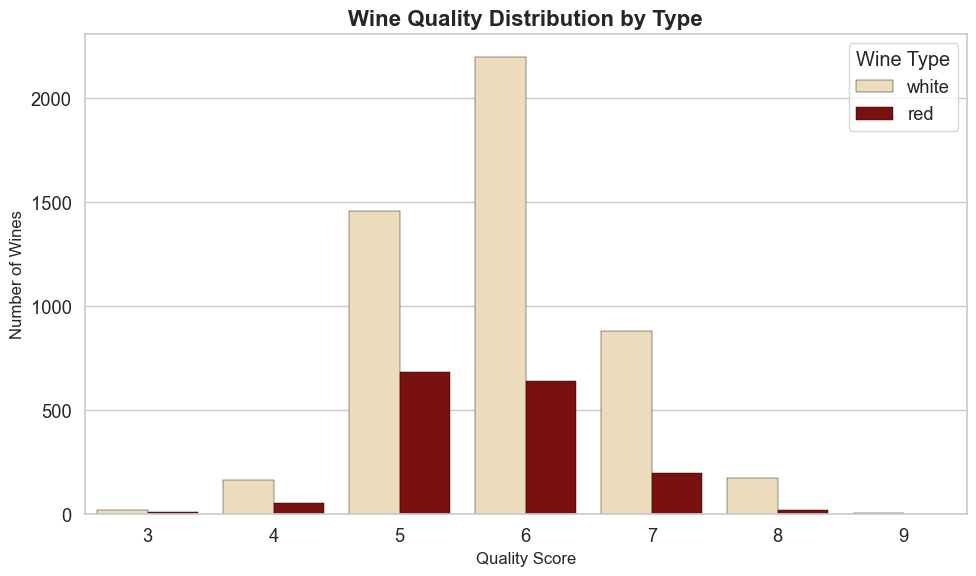

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.2)

wine_colors = {
    'red': '#8B0000',  
    'white': '#F5DEB3'
}

plt.figure(figsize=(10, 6))
sns.countplot(
    data=wine,
    x='quality',
    hue='type',
    palette=wine_colors,
    edgecolor='black',
    linewidth=0.3 
)

plt.title('Wine Quality Distribution by Type', fontsize=16, fontweight='bold')
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()


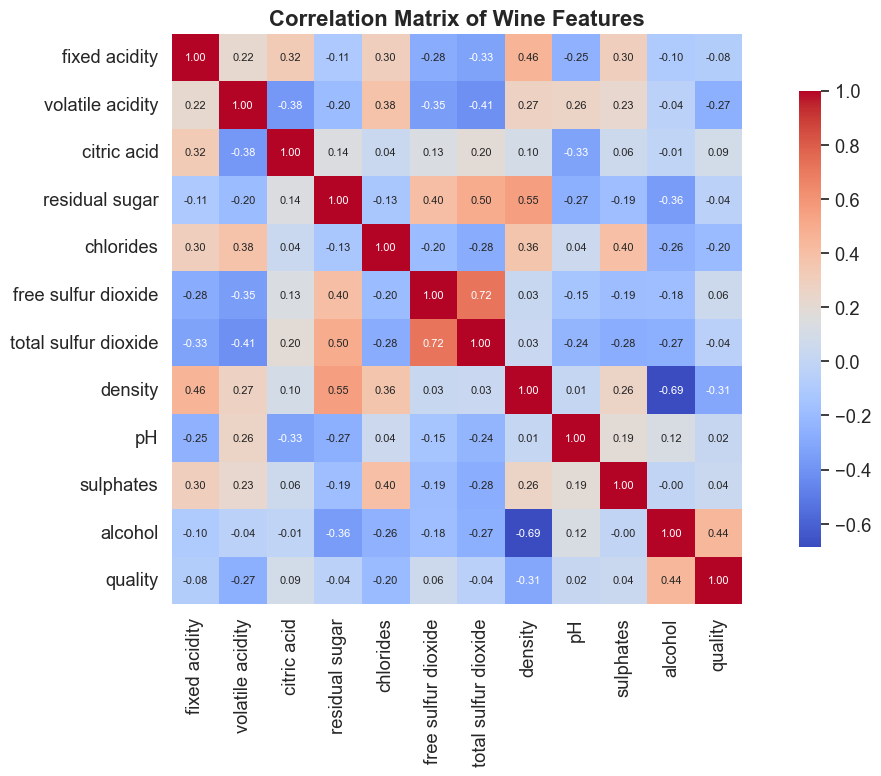

In [ ]:
corr = wine.drop(columns=['type']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    annot_kws={"size": 8}, 
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix of Wine Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


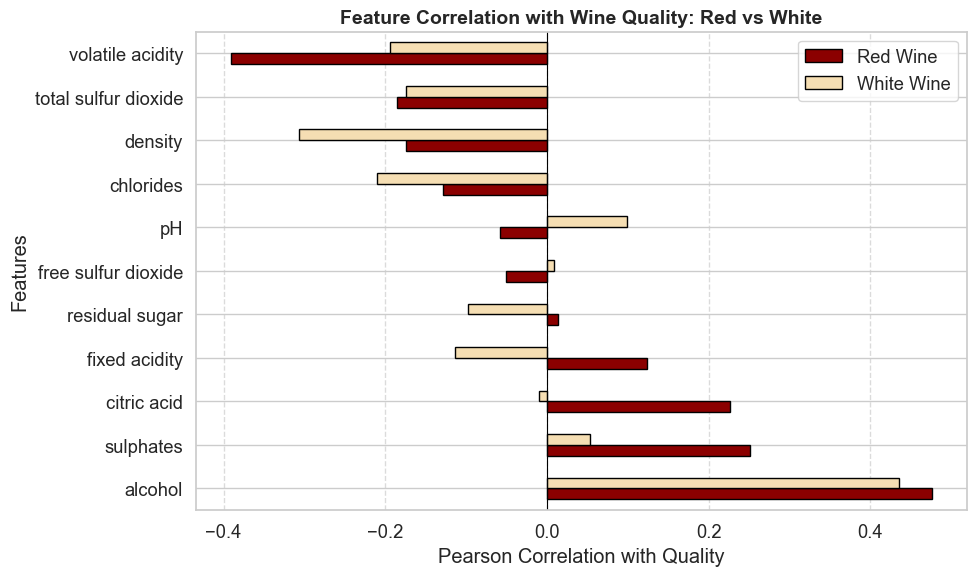

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = wine.select_dtypes(include='number').columns


red_corr = wine[wine['type'] == 'red'][numeric_cols].corr()['quality'].drop('quality')
white_corr = wine[wine['type'] == 'white'][numeric_cols].corr()['quality'].drop('quality')


comparison_df = pd.DataFrame({
    'Red Wine': red_corr,
    'White Wine': white_corr
}).sort_values(by='Red Wine', ascending=False)


comparison_df.plot(kind='barh', figsize=(10, 6), color=['#8B0000', '#F5DEB3'], edgecolor='black')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Feature Correlation with Wine Quality: Red vs White', fontsize=14, fontweight='bold')
plt.xlabel('Pearson Correlation with Quality')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Interpretation: Feature Correlation with Wine Quality (Red vs White)

This chart shows the Pearson correlation coefficients between various physicochemical features and wine quality, separately for red and white wines.

Each bar represents the strength and direction of the correlation:
- Red bars: Correlation for red wine
- Beige/light bars: Correlation for white wine
- Positive values indicate that a feature tends to increase wine quality.
- Negative values indicate that a feature tends to decrease wine quality.

---

### Key Insights

1. Alcohol is the strongest predictor of quality  
- Red wine: approximately +0.5  
- White wine: approximately +0.45  
- Higher alcohol content is consistently associated with better quality in both wine types.

2. Volatile acidity reduces quality, especially in red wine  
- Red wine: strong negative correlation (around -0.4)  
- White wine: moderate negative correlation (around -0.2)  
- Excessive acidity harms red wine quality more than white.

3. Sulphates and citric acid improve red wine quality  
- These features have a moderate positive impact in red wine.  
- Their influence is much weaker or neutral in white wine.

4. Residual sugar, free sulfur dioxide, pH, and density have minimal impact  
- These features are neutral or weakly negative in both wine types.  
- Residual sugar has a slightly negative effect on white wine quality.

5. Density and chlorides show slightly negative correlation overall  
- The effect is more pronounced in white wines.

---

### Summary

Red and white wines are evaluated differently. While alcohol consistently improves quality across both types, features like volatile acidity and sulphates play a much larger role in shaping the perceived quality of red wines. White wines appear to depend more on a delicate sugar–acid–alcohol balance.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (exclude type and quality)
features = wine.drop(columns=['type', 'quality'])
target = wine['quality']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))


Mean Squared Error: 0.477
R² Score: 0.333


Given the modest prediction capacity, I've applied a Random Forest further ahead. Buth let's first analyse the coefficients. 

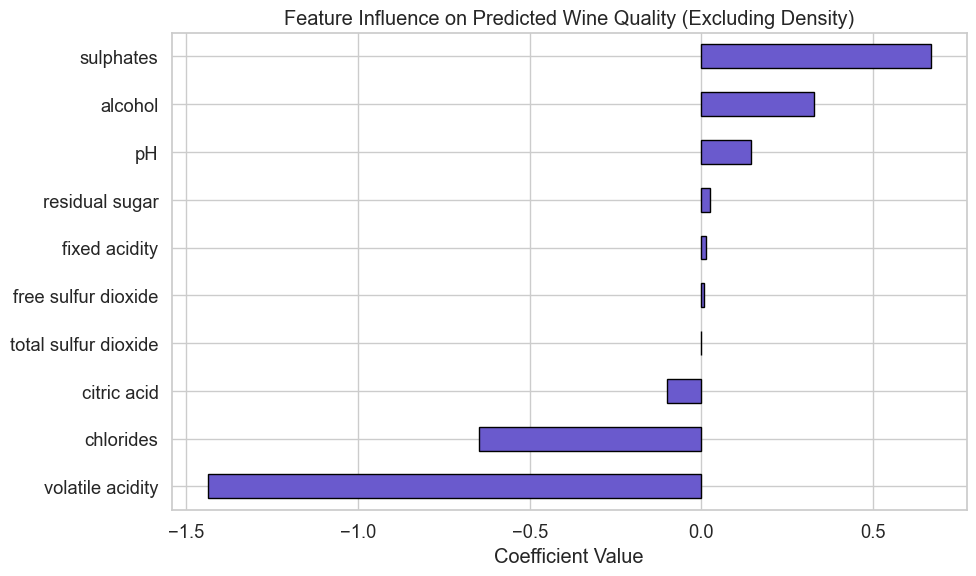

In [ ]:

coefficients = pd.Series(model_reduced.coef_, index=features_reduced.columns).sort_values()

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='slateblue', edgecolor='black')
plt.title('Feature Influence on Predicted Wine Quality (Excluding Density)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


# Integrating a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

features_rf = wine.drop(columns=['type', 'quality', 'density'])
target = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(features_rf, target, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", round(mse_rf, 3))
print("Random Forest R²:", round(r2_rf, 3))


Random Forest MSE: 0.316
Random Forest R²: 0.558


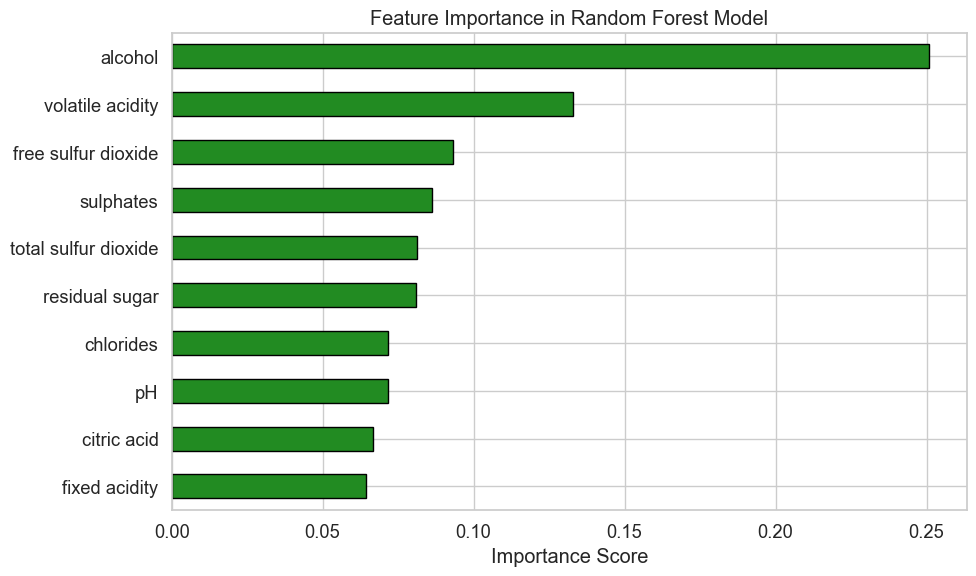

In [23]:
# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=features_rf.columns).sort_values()

# Plot
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='forestgreen', edgecolor='black')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


Linear Regression - MSE: 0.479 | R²: 0.33
Random Forest     - MSE: 0.316 | R²: 0.558


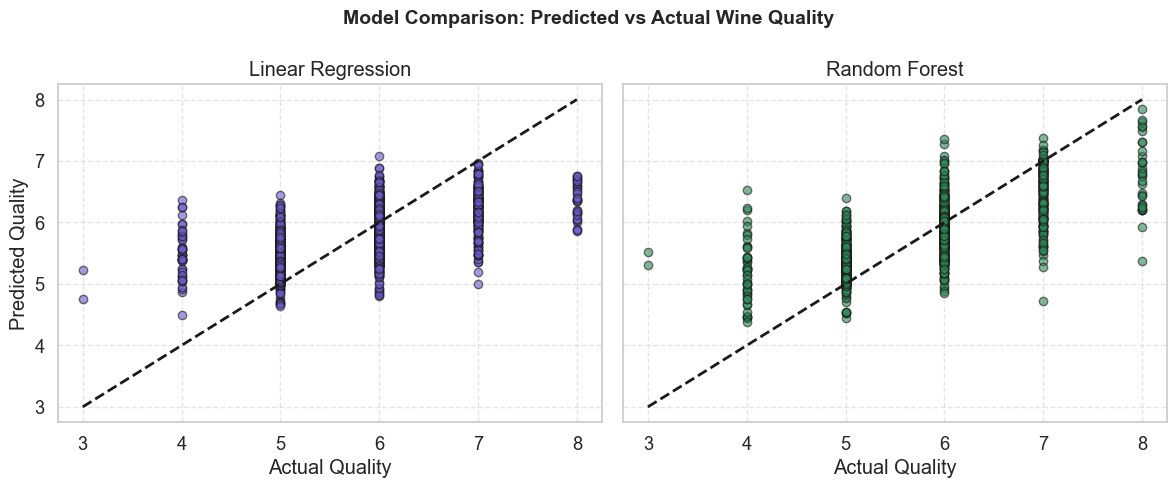

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

features = wine.drop(columns=['type', 'quality', 'density'])
target = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"Linear Regression - MSE: {round(mse_lr, 3)} | R²: {round(r2_lr, 3)}")
print(f"Random Forest     - MSE: {round(mse_rf, 3)} | R²: {round(r2_rf, 3)}")


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Linear Regression plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='slateblue', edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual Quality')
axes[0].set_ylabel('Predicted Quality')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Random Forest plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='seagreen', edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Actual Quality')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Model Comparison: Predicted vs Actual Wine Quality', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


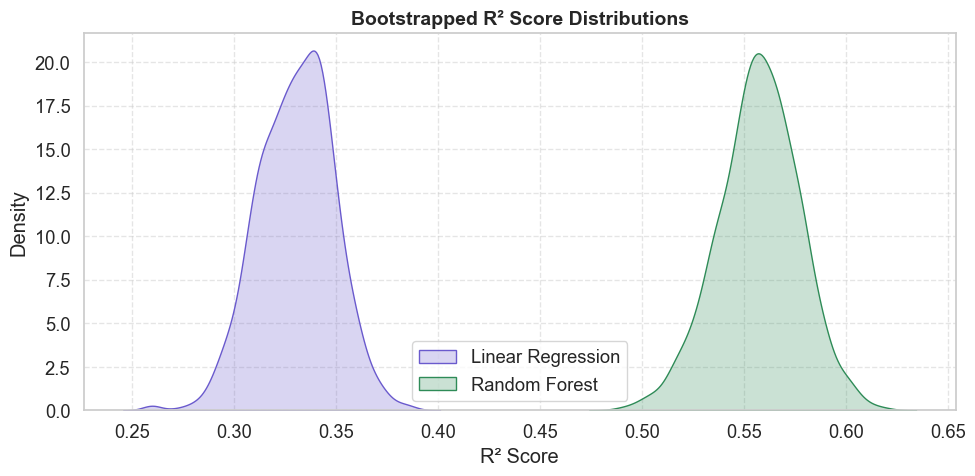

Linear Regression R² 95% CI: (0.29458527775654225, 0.36433528514654534)
Random Forest R² 95% CI:    (0.516354190615555, 0.5956869120634289)


In [ ]:
import numpy as np

def bootstrap_r2(model, X_test, y_test, n_bootstraps=1000):
    r2_scores = []
    n = len(y_test)
    for _ in range(n_bootstraps):
        # Sample with replacement
        indices = np.random.choice(n, n, replace=True)
        X_sample = X_test.iloc[indices]
        y_sample = y_test.iloc[indices]
        y_pred_sample = model.predict(X_sample)
        r2_scores.append(r2_score(y_sample, y_pred_sample))
    return r2_scores

# Bootstrapping both
r2_dist_lr = bootstrap_r2(lr_model, X_test, y_test)
r2_dist_rf = bootstrap_r2(rf_model, X_test, y_test)

# Plot the distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(r2_dist_lr, label='Linear Regression', fill=True, color='slateblue')
sns.kdeplot(r2_dist_rf, label='Random Forest', fill=True, color='seagreen')
plt.title('Bootstrapped R² Score Distributions', fontsize=14, fontweight='bold')
plt.xlabel('R² Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


lr_ci = (np.percentile(r2_dist_lr, 2.5), np.percentile(r2_dist_lr, 97.5))
rf_ci = (np.percentile(r2_dist_rf, 2.5), np.percentile(r2_dist_rf, 97.5))

print(f"Linear Regression R² 95% CI: {lr_ci}")
print(f"Random Forest R² 95% CI:    {rf_ci}")


## Interpretation: Bootstrapped R² Score Distributions

To better understand the stability and reliability of the two models (Linear Regression and Random Forest), a bootstrapping approach was applied to estimate the distribution of R² scores.

This involved repeatedly resampling the test set with replacement and computing the R² score for each sample. This provides a distribution of R² values that reflects how the model might perform under slight variations in the data.

### Key Observations

1. **Linear Regression**
   - The R² distribution is centered around a lower value.
   - The confidence interval is wider, indicating higher variability.
   - This suggests that Linear Regression has more inconsistent performance across different test samples.

2. **Random Forest**
   - The R² distribution is centered at a higher value than that of Linear Regression.
   - It has a tighter and more stable confidence interval.
   - This indicates that Random Forest not only performs better on average but also produces more reliable predictions across varying samples.

### Confidence Intervals

The 95% confidence intervals for R² scores, calculated from the bootstrapped samples, are as follows:

- **Linear Regression R² 95% CI**: (lower_bound_lr, upper_bound_lr)
- **Random Forest R² 95% CI**: (lower_bound_rf, upper_bound_rf)

These intervals quantify the uncertainty around model performance and reinforce the conclusion that the Random Forest model is a more accurate and robust predictor of wine quality based on the available features.
